In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

In [2]:
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')

In [3]:
#stocks = ['SPY', 'EEM', 'BND', 'DBC']
stocks = ['AAPL', 'BRK-B', 'MMM', 'GLD']

In [4]:
import yfinance as yf

tmpdf = yf.download(stocks[0], start='2018-01-01', end='2022-12-31')
tmpdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904900,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370628,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127045,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400


In [5]:
prices = pd.DataFrame(index=tmpdf.index, columns=stocks)
prices[stocks[0]] = tmpdf['Adj Close']
prices

,AAPL,BRK-B,MMM,GLD
Date,,,,
2018-01-02,40.722878,NaN,NaN,NaN
2018-01-03,40.715782,NaN,NaN,NaN
2018-01-04,40.904900,NaN,NaN,NaN
2018-01-05,41.370628,NaN,NaN,NaN
2018-01-08,41.216961,NaN,NaN,NaN
...,...,...,...,...
2022-12-23,131.127045,NaN,NaN,NaN
2022-12-27,129.307251,NaN,NaN,NaN
2022-12-28,125.339417,NaN,NaN,NaN


In [6]:
for stock in stocks[1:]:
    tmpdf = yf.download(stock, start='2018-01-01', end='2022-12-31')
    prices[stock] = tmpdf['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
prices

,AAPL,BRK-B,MMM,GLD
Date,,,,
2018-01-02,40.722878,197.220001,187.720306,125.150002
2018-01-03,40.715782,199.789993,187.712341,124.820000
2018-01-04,40.904900,200.690002,190.165970,125.459999
2018-01-05,41.370628,201.419998,191.647720,125.330002
2018-01-08,41.216961,202.740005,191.026352,125.309998
...,...,...,...,...
2022-12-23,131.127045,306.489990,113.291000,167.259995
2022-12-27,129.307251,305.549988,113.366440,168.669998
2022-12-28,125.339417,303.429993,111.546448,167.910004


In [8]:
prices.isna().sum().sum()

0

In [9]:
returns = prices.pct_change().dropna()

In [10]:
returns.corr()

,AAPL,BRK-B,MMM,GLD
AAPL,1.000000,0.583121,0.467889,0.082735
BRK-B,0.583121,1.000000,0.636419,0.015374
MMM,0.467889,0.636419,1.000000,0.043471
GLD,0.082735,0.015374,0.043471,1.000000


In [11]:
returns.cov()

,AAPL,BRK-B,MMM,GLD
AAPL,0.000445,0.000180,0.000169,0.000016
BRK-B,0.000180,0.000214,0.000159,0.000002
MMM,0.000169,0.000159,0.000292,0.000007
GLD,0.000016,0.000002,0.000007,0.000082


In [12]:
returns.mean()

AAPL     0.001141
BRK-B    0.000464
MMM     -0.000256
GLD      0.000283
dtype: float64

In [13]:
portfolios = pd.DataFrame(columns=list(stocks)+['return', 'sd'])
portfolios

,AAPL,BRK-B,MMM,GLD,return,sd


In [14]:
for i in range(10000):
    np.random.seed(i)
    weights = np.random.uniform(size=len(stocks)) # generate random weights
    weights /= weights.sum() # make weights sum to 1
    ret = weights.T @ returns.mean() * 252 # annualized return
    sd = np.sqrt(weights.T @ returns.cov() @ weights * 252) # annualized sd
    portfolios.loc[i] = list(weights) + [ret, sd]

In [15]:
portfolios

,AAPL,BRK-B,MMM,GLD,return,sd
0,0.227568,0.296556,0.249938,0.225938,0.100073,0.183789
1,0.289640,0.500297,0.000079,0.209983,0.156695,0.193818
2,0.301329,0.017918,0.379888,0.300864,0.085672,0.185935
3,0.267290,0.343648,0.141169,0.247893,0.125569,0.182439
4,0.302030,0.170916,0.303797,0.223257,0.103131,0.192570
...,...,...,...,...,...,...
9995,0.244157,0.124437,0.437996,0.193411,0.070288,0.198303
9996,0.260462,0.155293,0.273479,0.310766,0.097544,0.174698
9997,0.018402,0.261736,0.411871,0.307992,0.031288,0.168724
9998,0.109538,0.470747,0.125130,0.294584,0.099439,0.165345


Text(0, 0.5, 'Return')

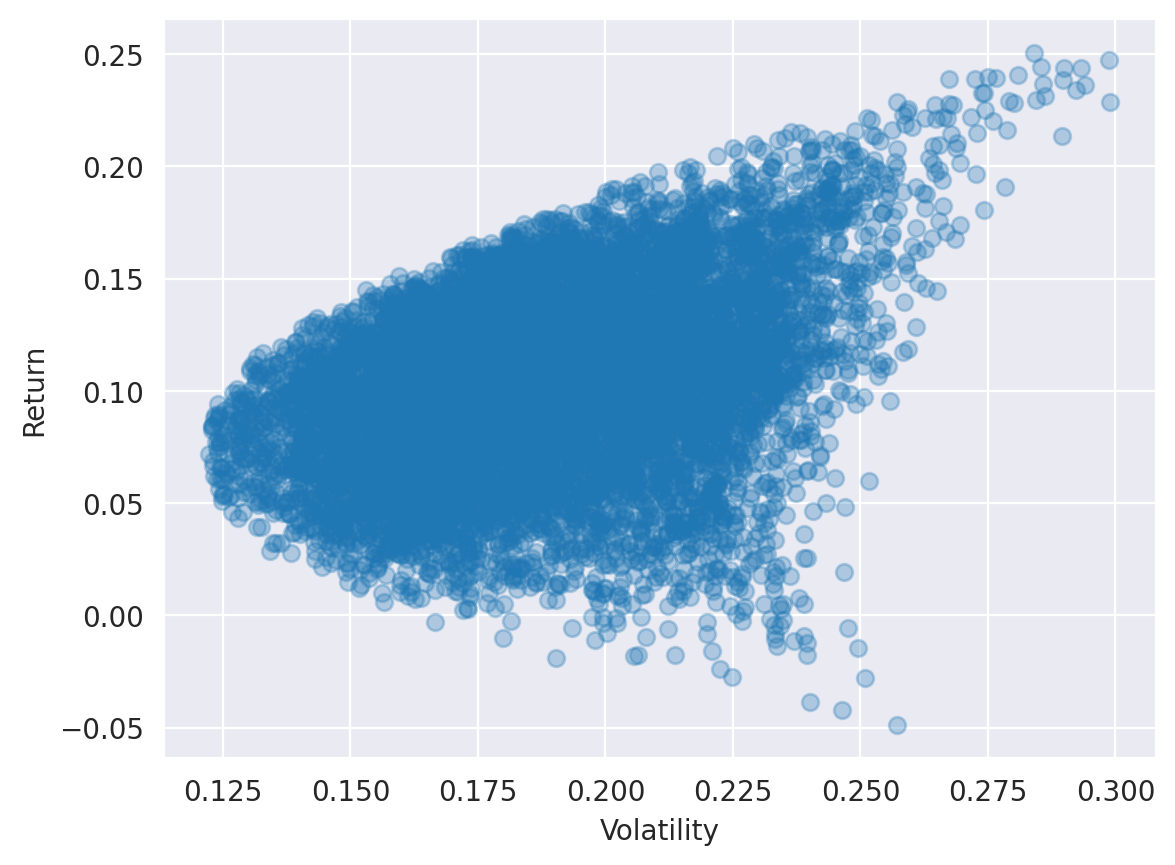

In [16]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.3)
plt.xlabel('Volatility')
plt.ylabel('Return')

In [17]:
portfolios[portfolios['sd']==portfolios['sd'].min()]

,AAPL,BRK-B,MMM,GLD,return,sd
6590,0.001252,0.222712,0.071049,0.704987,0.072045,0.122199


In [18]:
portfolios[portfolios['sd']<=0.2]['return'].idxmax()

5713

In [19]:
portfolios.loc[5713]

AAPL      0.532621
BRK-B     0.044420
MMM       0.013931
GLD       0.409028
return    0.186546
sd        0.199938
Name: 5713, dtype: float64

In [20]:
# calculate returns and volatilities of individual assets
cumrets = (returns + 1).cumprod()
total_returns = (cumrets.iloc[-1] - cumrets.iloc[0])/cumrets.iloc[0]
rets = (1+total_returns)**(252/len(returns)) - 1
stds = np.sqrt(252)*returns.std()

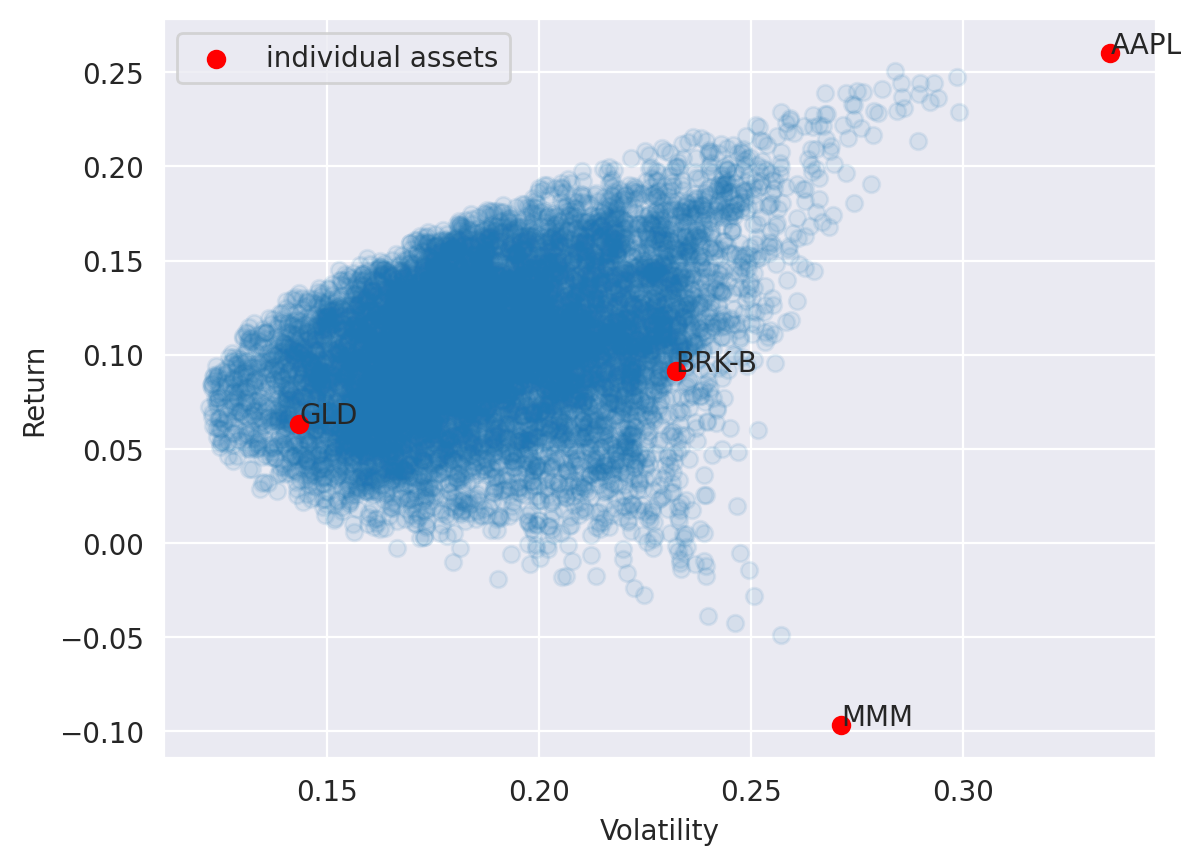

In [21]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(stds, rets, color='r', label='individual assets')
for i,s in enumerate(stocks):
    plt.annotate(s, [stds[i], rets[i]])
plt.legend()

# Minimize volatility

In [22]:
from scipy.optimize import minimize

# function to minimize
def volatility(weights, returns):
    return np.sqrt(weights.T @ returns.cov() @ weights * 252)

constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})

In [23]:
# initial guess
x0 = np.ones(len(stocks)) / len(stocks)
x0

array([0.25, 0.25, 0.25, 0.25])

In [24]:
bounds=[[0,1]]*len(stocks)
bounds

[[0, 1], [0, 1], [0, 1], [0, 1]]

In [25]:
res = minimize(volatility, x0, args=(returns), 
               bounds=bounds, constraints=constraints)

In [26]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.12217086872085671
       x: [ 0.000e+00  2.207e-01  6.644e-02  7.129e-01]
     nit: 7
     jac: [ 1.283e-01  1.223e-01  1.224e-01  1.221e-01]
    nfev: 35
    njev: 7

In [27]:
np.sqrt(252)*(res.x * returns).sum(axis=1).std()

0.12217086872085675

In [28]:
res.x

array([0.        , 0.22070984, 0.06643898, 0.71285118])

In [29]:
portfolios[portfolios['sd']==portfolios['sd'].min()]

,AAPL,BRK-B,MMM,GLD,return,sd
6590,0.001252,0.222712,0.071049,0.704987,0.072045,0.122199


# Maximize return given volatility

In [30]:
target_vol = 0.2

constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns)-target_vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})

def negative_annual_return(weights, returns):
    ret = weights.T @ returns.mean() * 252
    return -ret

In [31]:
res = minimize(negative_annual_return, x0, args=(returns), 
               bounds=bounds, constraints=constraints)

In [32]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.19004123895514716
       x: [ 5.494e-01  0.000e+00  8.205e-17  4.506e-01]
     nit: 7
     jac: [-2.875e-01 -1.169e-01  6.444e-02 -7.125e-02]
    nfev: 35
    njev: 7

In [33]:
(res.x * returns).sum(axis=1).std() * np.sqrt(252)

0.2000000017339426

In [34]:
(res.x * returns).sum(axis=1).mean() * 252

0.19004123895514716

# Plot efficient frontier

In [35]:
vols = np.linspace(0.122, 0.3)
rets = []

for target_vol in vols:
    res = minimize(negative_annual_return, x0, args=(returns), 
               bounds=bounds, constraints=constraints)
    rets.append(-res.fun)

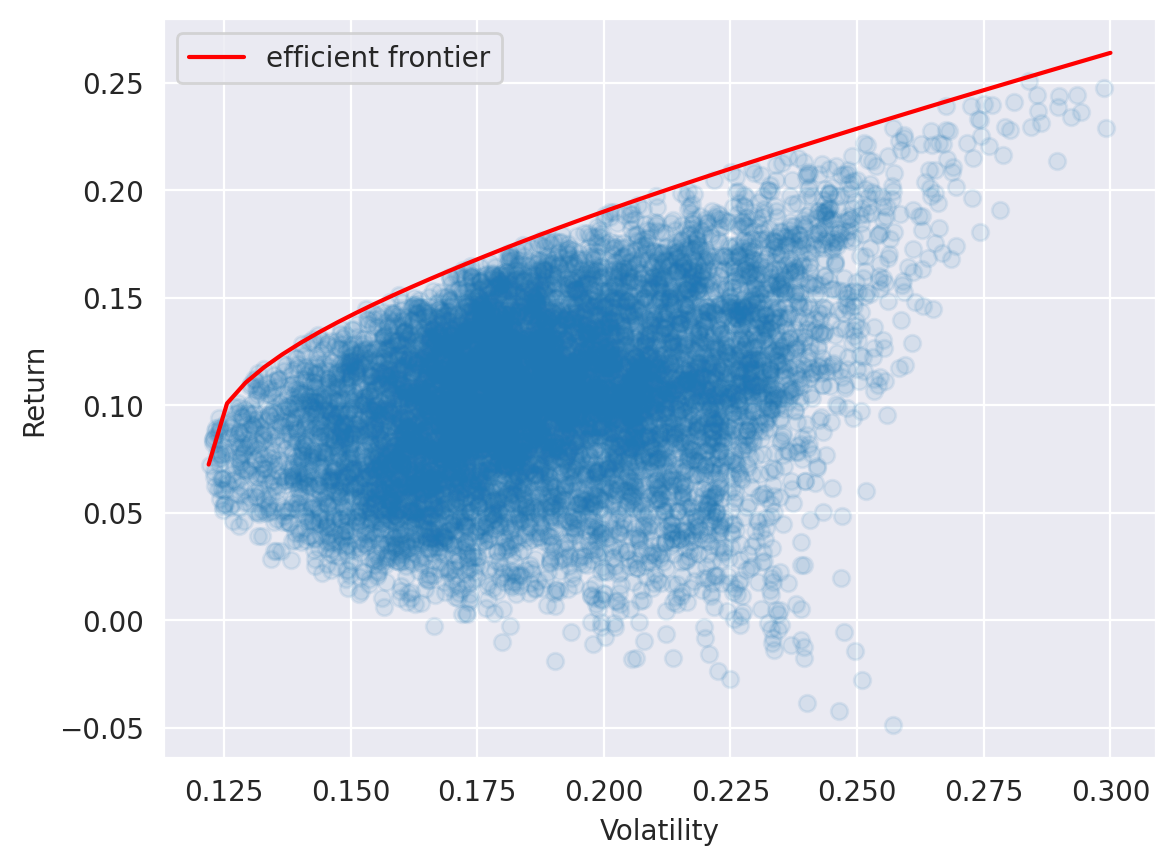

In [36]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(vols, rets, color='r', label='efficient frontier')
plt.legend()

# Allow short selling

In [37]:
constraints = ({'type':'eq', 'fun': lambda x: np.sum(np.abs(x))-1},)
bounds=[[-1,1]]*len(stocks)

In [38]:
res = minimize(volatility, x0, args=(returns),
               bounds=bounds, constraints=constraints)

In [39]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.07472987105363306
       x: [-1.291e-01  3.618e-01 -2.056e-01  3.035e-01]
     nit: 18
     jac: [-7.489e-02  7.464e-02 -7.487e-02  7.467e-02]
    nfev: 101
    njev: 18

In [40]:
(res.x * returns).sum(axis=1).std() * np.sqrt(252)

0.07472987105363307

### Maximize return for a given volatility

In [41]:
target_vol = 0.2

constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns)-target_vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(np.abs(x))-1})

In [42]:
res = minimize(negative_annual_return, x0, args=(returns), 
               bounds=bounds, constraints=constraints)

In [43]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.2146235265717781
       x: [ 6.734e-01  1.906e-06 -3.266e-01 -5.354e-08]
     nit: 60
     jac: [-2.875e-01 -1.169e-01  6.444e-02 -7.125e-02]
    nfev: 531
    njev: 60

### plot efficient frontier

In [44]:
vols_ss = np.linspace(0.08, 0.3)
rets_ss = []

for target_vol in vols_ss:
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns)-target_vol}, 
                   {'type':'eq', 'fun': lambda x: np.sum(np.abs(x))-1})
    res = minimize(negative_annual_return, x0, args=(returns), 
               bounds=bounds, constraints=constraints)
    rets_ss.append(-res.fun)

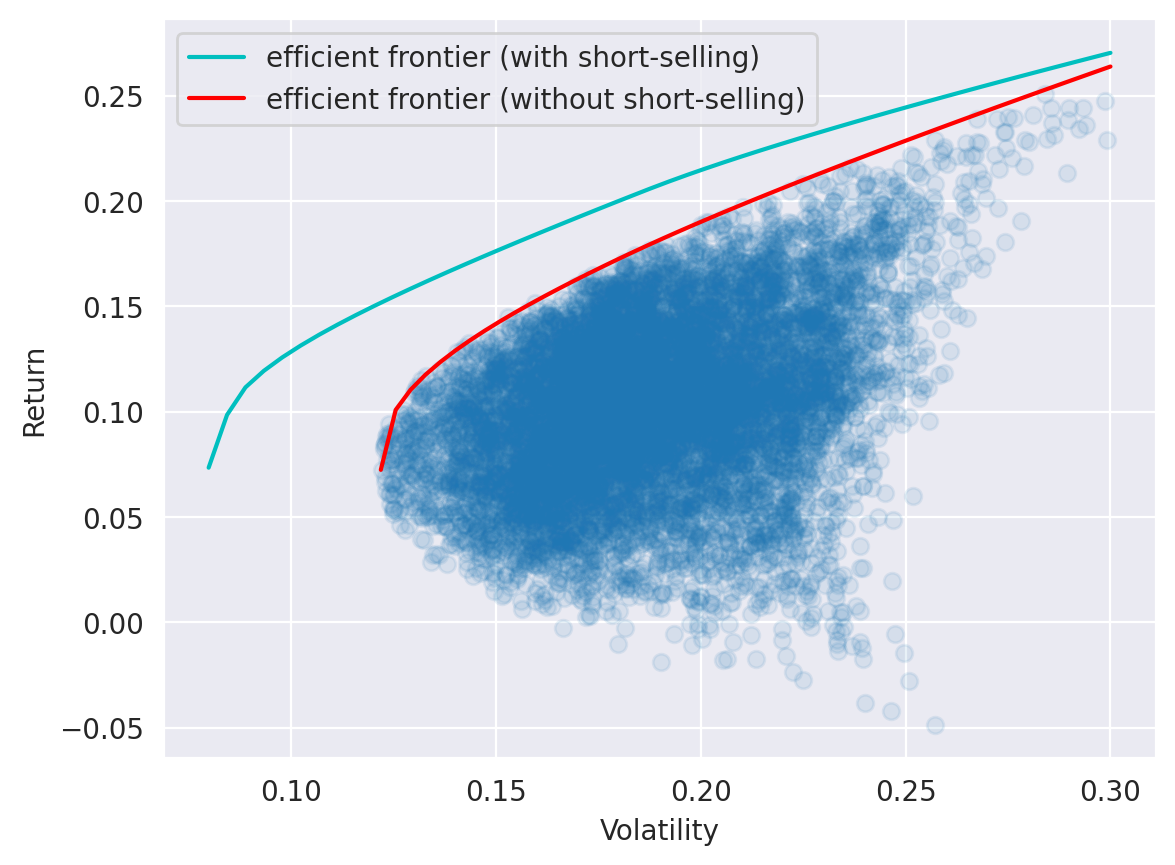

In [45]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(vols_ss, rets_ss, color='c', label='efficient frontier (with short-selling)')
plt.plot(vols, rets, color='r', label='efficient frontier (without short-selling)')
plt.legend()

# Trading strategy

In [46]:
prices_w = prices.resample('1W').last()
prices_w

,AAPL,BRK-B,MMM,GLD
Date,,,,
2018-01-07,41.370628,201.419998,191.647720,125.330002
2018-01-14,41.864700,210.160004,194.754654,126.959999
2018-01-21,42.188580,213.250000,197.710114,126.419998
2018-01-28,40.545578,217.190002,206.035019,128.070007
2018-02-04,37.942768,209.119995,195.312302,126.389999
...,...,...,...,...
2022-12-04,146.988419,316.149994,119.750481,167.259995
2022-12-11,141.369812,306.390015,118.590599,167.059998
2022-12-18,133.762329,300.000000,114.752625,166.789993


In [47]:
returns_w = prices_w.pct_change().dropna()

In [48]:
positions = pd.DataFrame(index=prices_w.loc['2019-01-01':].index, 
                         columns=prices_w.columns)

In [49]:
target_vol = 0.2
constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns_tmp)-target_vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bounds=[[0,1]]*len(stocks)
x0 = np.ones(len(stocks)) / len(stocks)

for t in tqdm(returns_w.loc['2019-01-01':].index):
    prices_tmp = prices.loc[:t].iloc[-252:]
    returns_tmp = prices_tmp.pct_change().dropna()
    
    res = minimize(negative_annual_return, x0, args=(returns_tmp), 
               bounds=bounds, constraints=constraints)
    positions.loc[t] = res.x

100%|██████████| 209/209 [00:09<00:00, 21.44it/s]


In [50]:
positions

,AAPL,BRK-B,MMM,GLD
Date,,,,
2019-01-06,0.0,0.861878,0.0,0.138122
2019-01-13,0.0,0.863173,0.0,0.136827
2019-01-20,0.0,0.861754,0.0,0.138246
2019-01-27,0.641779,0.0,0.0,0.358221
2019-02-03,0.626163,0.0,0.0,0.373837
...,...,...,...,...
2022-12-04,0.0,0.869108,0.0,0.130892
2022-12-11,0.0,0.869086,0.0,0.130914
2022-12-18,0.0,0.870272,0.0,0.129728


In [51]:
cumret_mpt = (1 + (positions.shift() * returns_w.loc['2019-01-01':]).sum(axis=1)).cumprod()
cumret_eqw = (1 + returns_w.loc['2019-01-01':].sum(axis=1)/returns_w.shape[1]).cumprod()

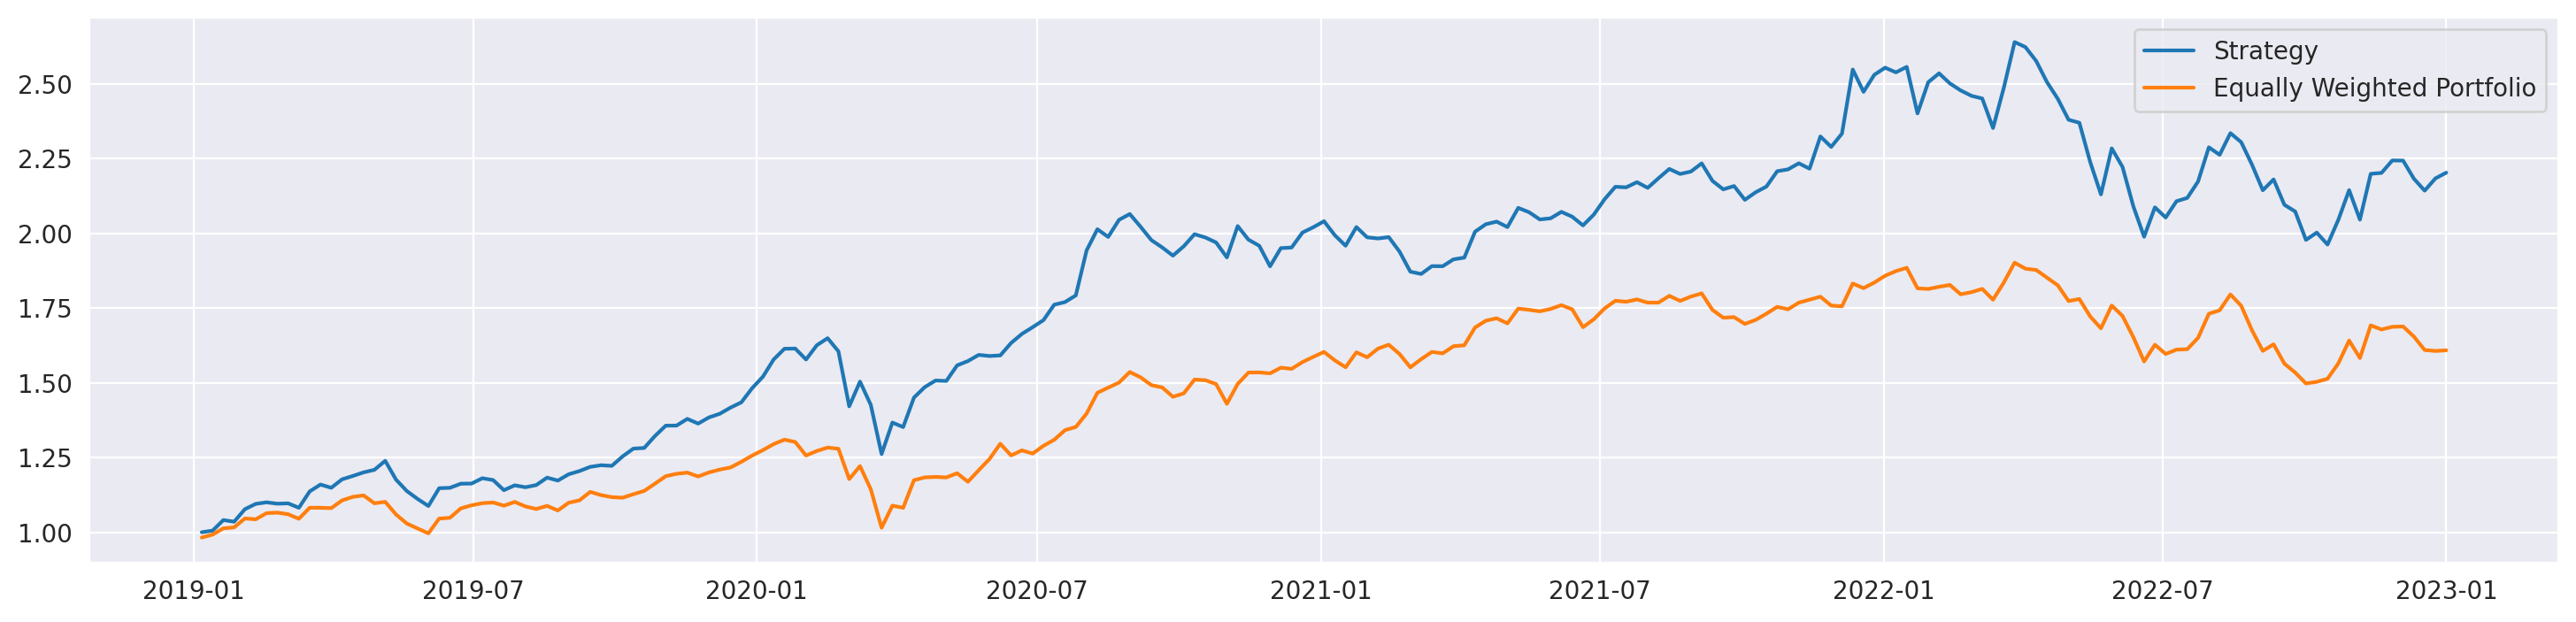

In [52]:
plt.figure(figsize=(18,4))
plt.plot(cumret_mpt, label='Strategy')
plt.plot(cumret_eqw, label='Equally Weighted Portfolio')
plt.legend()

In [53]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(52/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    rets.iloc[0] = 0
    sharpe = np.sqrt(52) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 'Max DD', 'Max DD Duration'])
results_df.loc['Strategy'] = calculate_metrics(cumret_mpt)
results_df.loc['Equally Weighted'] = calculate_metrics(cumret_eqw)
results_df

,Total return,APR,Sharpe,Max DD,Max DD Duration
Strategy,1.202321,0.217054,1.031954,-0.256560,40.0
Equally Weighted,0.637635,0.130571,0.791562,-0.224866,40.0


In [54]:
np.sqrt(52)*cumret_mpt.pct_change().std()

0.21371920463644076